# HTQ V2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'profit': 'expected_profit'})
df.head()

,TheHour,DayName,bidamount,won_ping,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
0,0,2,6.28,0.0,1.0,0.05,0.183007,0.0,0.000000,0.0,0.0,0.166667,0.222857,1.0,0.444444,0.444444,1.0,0.333333,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.32
1,0,2,5.17,0.0,0.0,0.00,0.156863,0.0,0.000000,0.0,0.0,0.166667,0.108571,0.0,0.000000,0.000000,1.0,0.000000,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.43
2,0,2,5.71,0.0,0.0,0.05,0.183007,0.0,0.000000,0.0,0.0,0.166667,0.222857,1.0,0.444444,0.444444,1.0,0.000000,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.89
3,0,2,5.48,1.0,0.0,0.10,0.078431,0.0,0.037736,0.0,0.0,0.166667,0.080000,1.

In [7]:
X = df.drop('won_ping', axis=1)
y = df['won_ping']

## Train Classifier Model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=30000)

# Train the model
model.fit(X_train, y_train)

# Make predictions

predictions = model.predict(X_test)

predict_probas = model.predict_proba(X_test)

probabilities_class_1 = predict_probas[:, 1]

# Evaluate the model
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86     13610
         1.0       0.89      0.76      0.82     11782

    accuracy                           0.84     25392
   macro avg       0.85      0.84      0.84     25392
weighted avg       0.85      0.84      0.84     25392

Accuracy: 0.8448724007561437


In [9]:
results = y_test.to_frame()
results['win_proba'] = probabilities_class_1
results['y_pred'] = predictions

## Plot Win probability as a function of Bid Price

In [10]:
space = np.linspace(0, 500, 500)

In [11]:
X_test.loc[[60540, 40646, 7215, 29609], :]

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
60540,6,2,5.62,0.0,0.100000,0.078431,0.0,0.037736,0.0,0.0,0.166667,0.080000,1.0,0.444444,0.444444,1.0,0.000000,0.0,12.6,0.913174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.98
40646,12,1,3.37,0.0,0.104167,0.163399,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.444444,0.444444,1.0,0.000000,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.23
7215,13,4,5.76,1.0,0.050000,0.183007,0.0,0.000000,0.0,0.0,0.166667,0.222857,1.0,0.444444,0.444444,1.0,0.333333,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.84
29609,0,5,6.00,0.0,0.050000,0.392157,0.0,0.000000,0.0,0.0,0.166667,0.1

In [12]:
idx_test = 104238
idx_original_bid_value = X_test.at[idx_test, 'bidamount']

In [119]:
sample = X_test.loc[[idx_test]]
sample

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
104238,11,2,7.31,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.111111,0.091429,1.0,0.444444,0.444444,1.0,0.0,0.0,12.6,0.706219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.155755


In [120]:
new_sample = sample.copy()
new_sample

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
104238,11,2,7.31,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.111111,0.091429,1.0,0.444444,0.444444,1.0,0.0,0.0,12.6,0.706219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.155755


In [121]:
res = []
for new_bid in space:
    new_sample.at[idx_test, 'bidamount'] = new_bid
    new_sample.at[idx_test, 'expected_profit'] = new_sample.at[idx_test, 'expected_revenue'] - new_bid
    profit = new_sample.at[idx_test, 'expected_revenue'] - new_bid
    proba = model.predict_proba(new_sample)[:, 1][0]
    res.append((new_bid, proba)) 

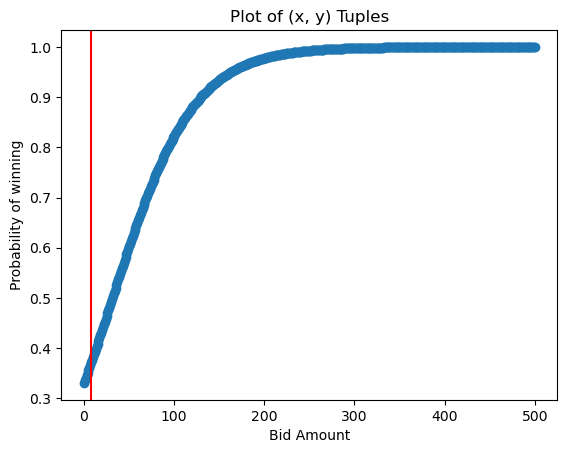

In [122]:
x, y = zip(*res)

# Create a scatter plot
plt.scatter(x, y)

# Optionally, you can also plot lines between the points
plt.plot(x, y)

# Adding titles and labels (optional)
plt.title("Plot of (x, y) Tuples")
plt.xlabel("Bid Amount")
plt.ylabel("Probability of winning")
plt.axvline(idx_original_bid_value, color='red')

# Show the plot
plt.show()

## Genetic Algorithm

In [13]:
X_test.head()

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
30079,8,5,7.62,1.0,0.100000,0.385621,0.0,0.000000,0.0,0.0,0.166667,0.102857,1.0,0.444444,0.444444,1.0,0.0,0.0,12.60,0.898772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.98
9573,12,5,2.10,0.0,0.050000,0.392157,0.0,0.000000,0.0,0.0,0.166667,0.120000,1.0,0.444444,0.444444,1.0,0.0,0.0,3.91,0.898772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.81
121581,6,3,3.94,1.0,0.050000,0.862745,0.0,0.000000,0.0,0.0,0.166667,0.022857,1.0,0.444444,0.444444,1.0,0.0,0.0,12.60,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.66
60540,6,2,5.62,0.0,0.100000,0.078431,0.0,0.037736,0.0,0.0,0.166667,0.080000,1.0,0.4

In [ ]:
import numpy as np

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [159]:
X_test['expected_profit'] = X_test[['expected_profit']].apply(lambda x: normalize_data(x))

In [16]:
X_test_sample = X_test.sample(10000)

### Deap

In [193]:
#GA ALGO
def generate_optimal_price(sample, model, weight_winning, weight_profit):
    # Define bounds for bidding price
    MIN_BID, MAX_BID = 0, 12.6

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, MIN_BID, MAX_BID)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def evaluate(individual):
        # Combine bidding price with other features
        example_with_new_bid = np.array(sample)
        example_with_new_bid[2] = individual[0]  # Replace the bid price
        # Predict probability
        prob_of_winning = model.predict_proba([example_with_new_bid])[0][1]
        expected_profit = example_with_new_bid[-1]
        print(expected_profit)
        fitness_score = (prob_of_winning * weight_winning) + (expected_profit * weight_profit)
        return fitness_score,

    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Initialize population
    population = toolbox.population(n=2)

    # GA parameters
    NGEN = 40
    CXPB, MUTPB = 0.7, 0.2

    # Run the GA
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring, k=len(population))

    top_individual = tools.selBest(population, k=1)[0]
    return top_individual[0]

In [ ]:
new_prices = []
j = 0
for i, row in X_test_sample.iterrows():
    if j % 5000 == 0:
        print(j)
    new_prices.append(generate_optimal_price(row.values, model, weight_winning=0.25, weight_profit=0.75))
    j+=1

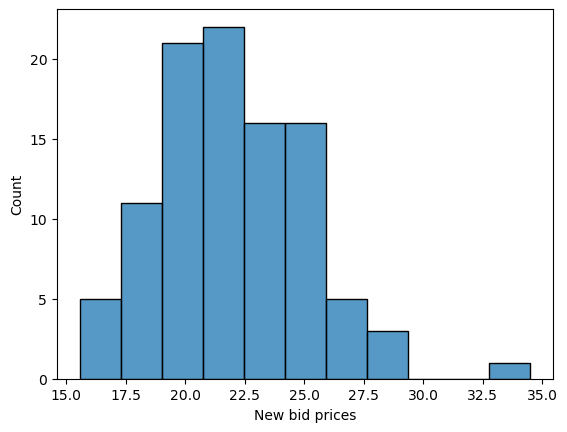

In [180]:
sns.histplot(new_prices)
plt.xlabel('New bid prices')
plt.show()

### PyGAD

In [ ]:
import pygad

def optimize_bid_price(base_features, min_, max_):
    
    def fitness_func(ga_instance, solution, solution_idx): 
        temp_features = np.array(base_features)
        temp_features[2] = solution[0]
        prob_of_winning = model.predict_proba([temp_features])[0][1]
        expected_revenue = temp_features[18]
        expected_profit = (expected_revenue - solution[0]) / 1000
        #expected_profit = (expected_profit - min_) / (max_ - min_)
        #expected_profit = temp_features[-1]
        weight_winning = 0.5
        fitness_score = (prob_of_winning * weight_winning) + (expected_profit * (1 - weight_winning))
        return fitness_score

    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=2,
                           fitness_func=fitness_func,
                           sol_per_pop=10,
                           num_genes=1,
                           gene_type=float,
                           gene_space=[{'low': 0, 'high': 12.6}], # Define your bid range
                           parent_selection_type="tournament",
                           crossover_type="single_point",
                           mutation_type="random",
                           mutation_percent_genes=20)

    ga_instance.run()
    solution, solution_fitness, _ = ga_instance.best_solution()
    return solution[0]  # Best bid price

# Iterate over dataset and optimize bid prices
new_prices = []
j = 0
for i, row in X_test_sample.iterrows():
    if j % 5000 == 0:
        print(j)
    new_prices.append(optimize_bid_price(row.values, X_test_sample['expected_profit'].min(), X_test_sample['expected_profit'].max()))
    j+=1

0


In [ ]:
sns.histplot(new_prices)
plt.xlabel('New bid prices')
plt.show()

In [114]:
X_test_sample['predicted_prices'] = new_prices
X_test_sample['optimal_profit'] = X_test_sample['expected_revenue'] - X_test_sample['predicted_prices']

ValueError: Length of values (0) does not match length of index (1000)

In [ ]:
X_test_sample[['bidamount', 'predicted_prices', 'optimal_profit', 'expected_revenue']].head()

In [111]:
X_test_sample['bidamount'].sum()

5122.24

In [112]:
X_test_sample['predicted_prices'].sum()

25411.510300507514